<a href="https://colab.research.google.com/github/jvataidee/pdi_python/blob/main/composicao_imagens_e_contraste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Realizando Composição de Bandas**

### Instalando bibliotecas

In [ ]:
!pip install spectral
!pip install rasterio
!pip install earthpy

### Importando bibliotecas

In [50]:
# Bibliotecas
from spectral import imshow
import matplotlib.pyplot as plt
import earthpy.spatial as es
import earthpy.plot as ep
import rasterio
from rasterio.plot import show
import numpy as np
import tifffile as tiff

## Processamentos

In [ ]:
with rasterio.open('/content/drive/MyDrive/pdi_python/21 - PDI com Python/01 - Pré-Processamento/L71221071_07120010720_DN.tif') as rst:
  b1 = rst.read(1)
  b2 = rst.read(2)
  b3 = rst.read(3)
  b4 = rst.read(4)
  b5 = rst.read(5)
  b6 = rst.read(6)

In [ ]:
image = np.stack((b3, b2, b1), axis=-1)

/usr/local/lib/python3.10/dist-packages/spectral/graphics/spypylab.py:796: UserWarning: Failed to create RectangleSelector object. Interactive pixel class labeling will be unavailable.
  warnings.warn(msg)


ImageView object:
  Display bands       :  [0, 1, 2]
  Interpolation       :  <default>
  RGB data limits     :
    R: [27.0, 98.0]
    G: [36.0, 74.0]
    B: [50.0, 78.0]

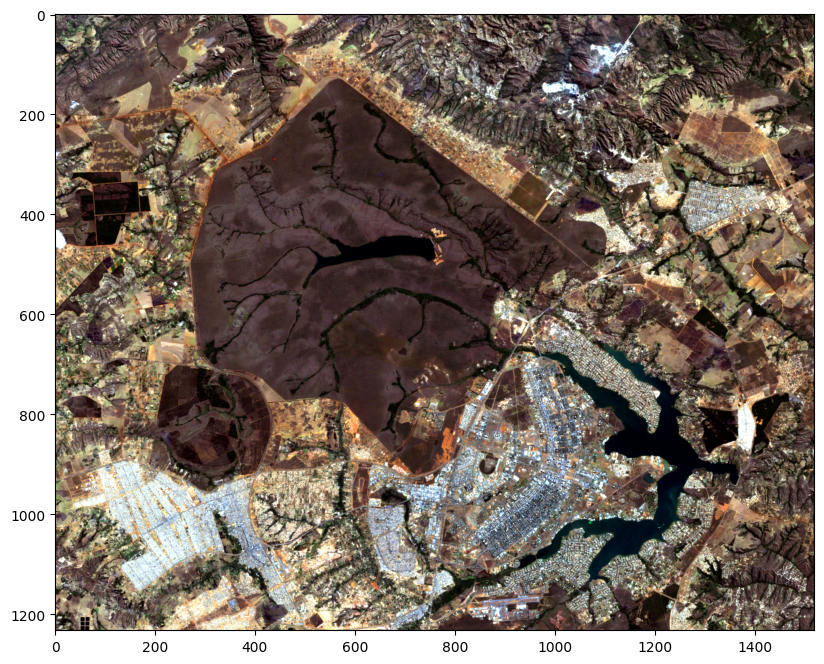

In [ ]:
imshow(image, stretch=(0.02,0.98),figsize=(12,8))

In [52]:
tiff.imwrite("imagem_RGB.tif", image)

In [ ]:
image = np.stack((b2, b3, b4), axis=-1)

ImageView object:
  Display bands       :  [0, 1, 2]
  Interpolation       :  <default>
  RGB data limits     :
    R: [36.0, 74.0]
    G: [27.0, 98.0]
    B: [15.0, 97.0]

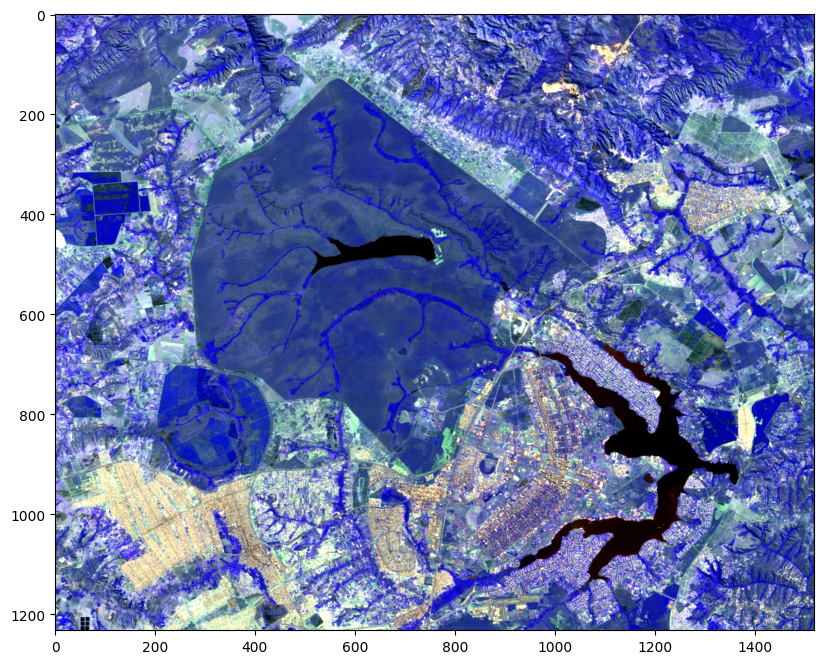

In [ ]:
imshow(image, stretch=(0.02,0.98),figsize=(12,8))

## Realizando Stack

In [ ]:
bandas_ep = []

for i in sorted(glob.glob('/content/drive/MyDrive/pdi_python/21 - PDI com Python/01 - Pré-Processamento/imagens/*[1-6].*')):
  bandas_ep.append(i)

In [ ]:
bandas_ep

['/content/drive/MyDrive/pdi_python/21 - PDI com Python/01 - Pré-Processamento/imagens/L71221071_07120010720_DN_B1.tif',
 '/content/drive/MyDrive/pdi_python/21 - PDI com Python/01 - Pré-Processamento/imagens/L71221071_07120010720_DN_B2.tif',
 '/content/drive/MyDrive/pdi_python/21 - PDI com Python/01 - Pré-Processamento/imagens/L71221071_07120010720_DN_B3.tif',
 '/content/drive/MyDrive/pdi_python/21 - PDI com Python/01 - Pré-Processamento/imagens/L71221071_07120010720_DN_B4.tif',
 '/content/drive/MyDrive/pdi_python/21 - PDI com Python/01 - Pré-Processamento/imagens/L71221071_07120010720_DN_B5.tif']

In [ ]:
stack_ep, meta_data = es.stack(bandas_ep)

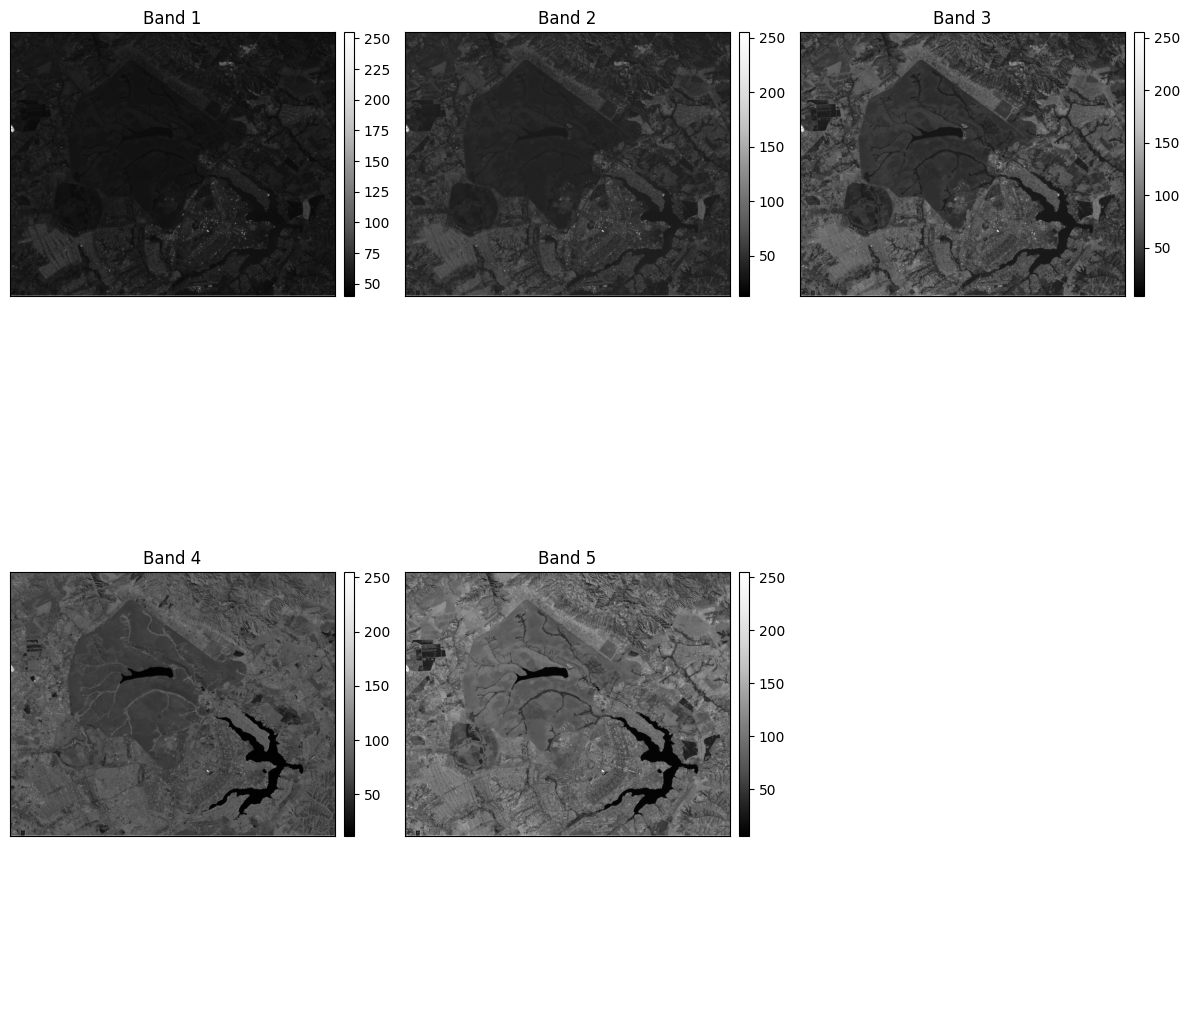

In [ ]:
ep.plot_bands(stack_ep )
plt.show()

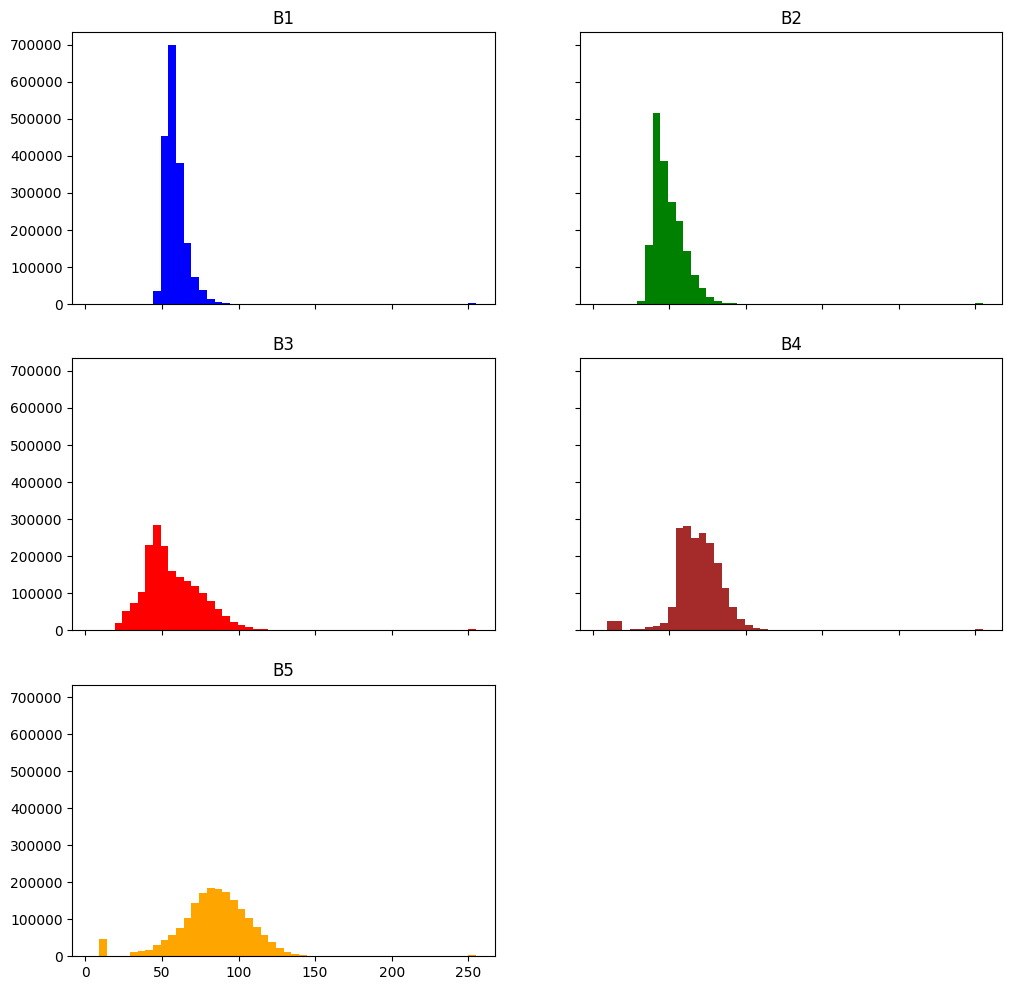

In [ ]:
colors = ['Blue','Green','Red','Brown','Orange']
nom = ['B1','B2','B3','B4','B5']
ep.hist(stack_ep, bins=50, colors=colors, title=nom)
plt.show()

In [ ]:
stack_rst = np.dstack([b1,b2,b3,b4,b5,b6])

In [ ]:
stack_rst.shape[2]

6

In [ ]:
stack_rst[:,:,0].flatten().shape

(1874160,)

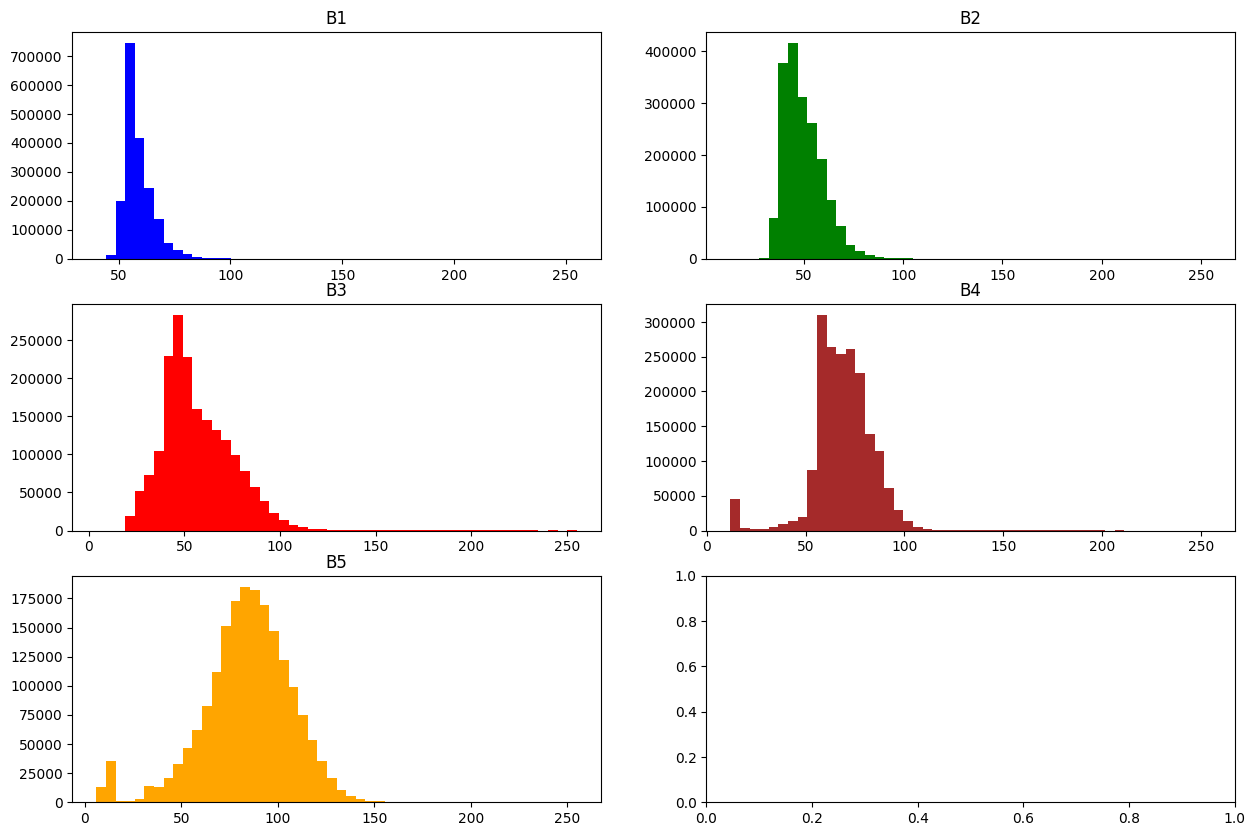

In [ ]:
fig, axes = plt.subplots(3,2, figsize=(15,10))

axes = axes.ravel()
for i in range(5):
  axes[i].hist(stack_rst[:,:,i].flatten(), color=colors[i], bins = 50)
  axes[i].set_title(nom[i], fontsize=12)

In [ ]:
def expansao(img, percent_min=2, percent_max=98):

    # Criando uma cópia vazia da imagem de entrada
    img2 = np.zeros_like(img)

    # Definindo os valores mínimos e máximos de intensidade
    x, y = 0, 255

    # Calculando os percentis mínimo e máximo
    pmin = np.percentile(img, percent_min)
    pmax = np.percentile(img, percent_max)

    # Aplicando a expansão de contraste
    f = x + (img - pmin) * (y - x) / (pmax - pmin)

    # Limitando os valores resultantes dentro do intervalo [x, y]
    f[f < x] = x
    f[f > y] = y

    # Atribuindo a imagem expandida à imagem de saída
    img2 = f

    # Retornando a imagem de saída após a expansão de contraste
    return img2


In [ ]:
stretch = expansao(stack_rst[:,:,0])

ImageView object:
  Display bands       :  [0]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 255.0]
    G: [0.0, 255.0]
    B: [0.0, 255.0]

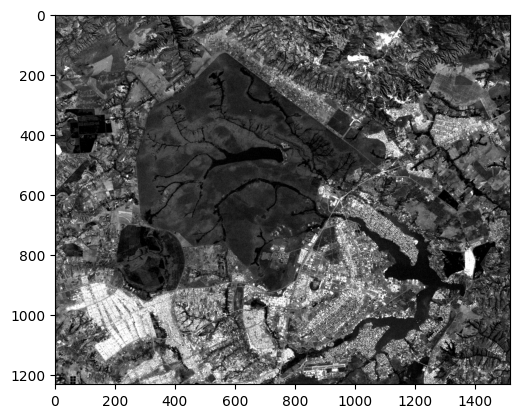

In [ ]:
imshow(stretch)

ImageView object:
  Display bands       :  [0]
  Interpolation       :  <default>
  RGB data limits     :
    R: [40.0, 255.0]
    G: [40.0, 255.0]
    B: [40.0, 255.0]

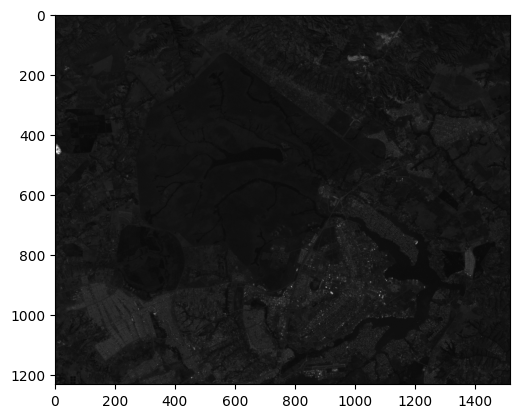

In [ ]:
imshow(stack_rst[:,:,0])

In [ ]:
exp = np.zeros_like(stack_rst)
exp.shape

(1233, 1520, 6)

In [ ]:
for i in range(6):
  exp[:,:,i] = expansao(stack_rst[:,:,i])

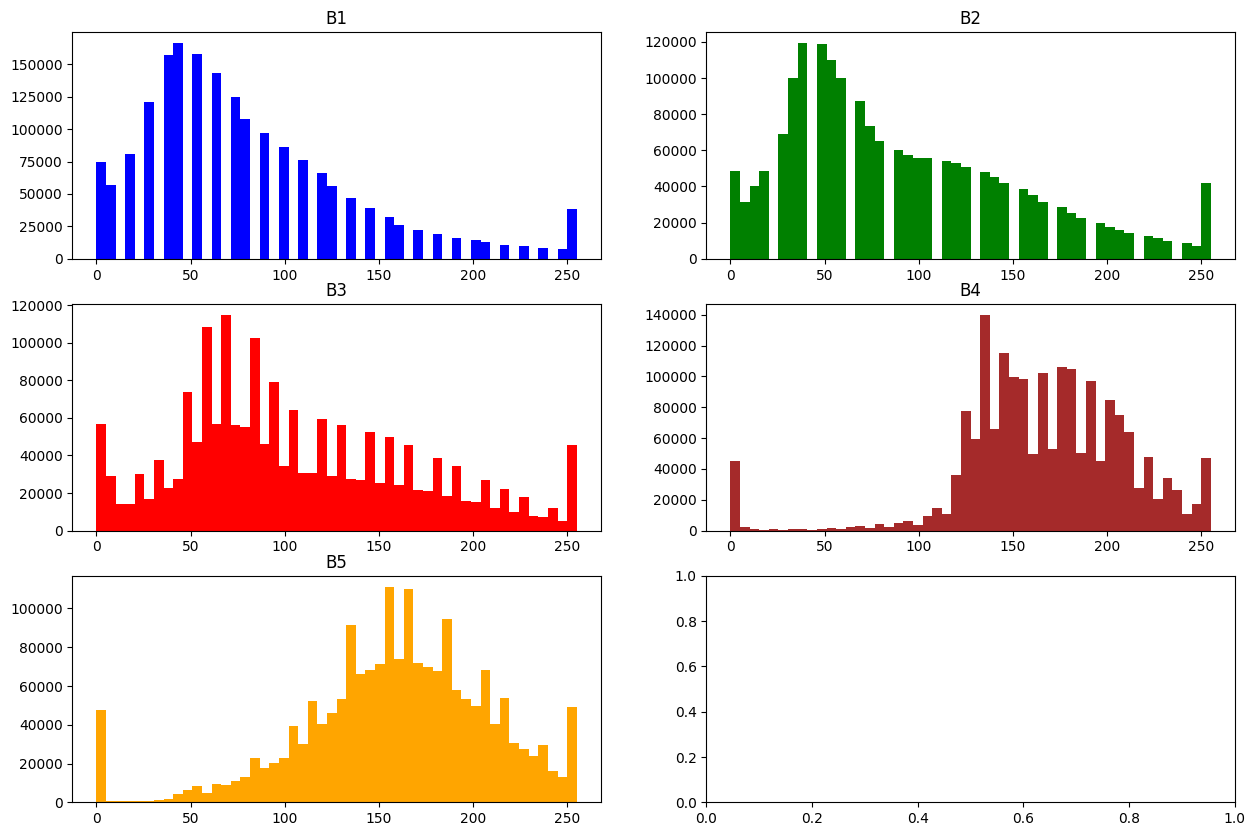

In [ ]:
fig2, axes2 = plt.subplots(3,2, figsize=(15,10))

axes2 = axes2.ravel()
for i in range(5):
  axes2[i].hist(exp[:,:,i].flatten(), color=colors[i], bins = 50)
  axes2[i].set_title(nom[i], fontsize=12)